# Generalized Eigenvalues and Image Segmentation

In this exercise, we will implement an algorithm for image segmentation from a graph-theoretic approach. As a simplified problem, we will focus on separating the foreground of an image from its background. An image is described as a matrix  MM  of shape (N, M) whose values represent the gray scale color normalized between zero and one. Even though we restrict now to gray images, please note that the same algorithm could be easily extended to colored images.

In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [2]:
# Solution to question 2.1.

M = misc.imread("img_cup_small.png", mode="L") 
M = M / 255

# Compute affinity matrix W for matrix M where W[i,j] = 1 - abs(M[xi,yi] - M[xj,yj]) 
# if pixel j is a neighbor of i and zero otherwise.
W = np.zeros((M.shape[0] * M.shape[1], M.shape[0] * M.shape[1]))
D = np.zeros(M.shape[0] * M.shape[1])
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        # Iterate through neighbors of pixel (i, j)
        for n_i in range(max(0, i-1), min(i+2, M.shape[0])):
            for n_j in range(max(0, j-1), min(j+2, M.shape[1])):
                if ((n_i, n_j) != (i, j)):
                    d_i_j = 1 - abs(M[i][j] - M[n_i][n_j])
                    W[M.shape[1]*i + j][M.shape[1]*n_i + n_j] = d_i_j
                    D[M.shape[1]*i + j] += d_i_j

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Find the generalized eigenvector y for the eigenvector with the second smallest eigenvalue.

In [3]:
# Solution to question 2.3.

L = (np.diag(D) - W)
D_inv_sqrt = np.diag(1. / np.sqrt(D))

# Compute eigenvalue decomposition of matrix D^(-1/2) (D - W) D^(-1/2).
u, s, vh = np.linalg.svd(D_inv_sqrt @ L @ D_inv_sqrt)

# Recover second smallest eigenvector. 
eigv_2 = u[:, u.shape[1] - 1]

In [4]:
# Solution to question 2.4.

# Compute median of second eigenvector.
median = np.median(eigv_2)

# Set values greater than median to 1, less than median to 0. 
segmented_labels = (eigv_2 > median).astype(int).reshape((M.shape[0], M.shape[1]))

# Set values greater than zero to 1, less than zero to 0. 
segmented_labels_2 = (eigv_2 > 0).astype(int).reshape((M.shape[0], M.shape[1]))

# Binary Image Visualization

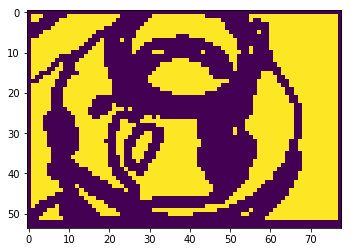

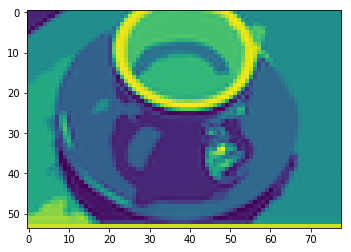

In [5]:
# Show segmentation labels. 
plt.imshow(segmented_labels)
plt.show()

# Show original image. 
plt.imshow(M)
plt.show()